# Molecular Docking Demo

The docking process of Dengue Virus NS2B/NS3 Protease and Baicalin

# **1. Install**

In [ ]:
#Install conda using the new conda-colab library
!pip install -q condacolab
import condacolab
condacolab.install_miniconda()

#Install MGLtools and OpenBabel from
#the bioconda repository
!conda install -c conda-forge -c bioconda mgltools openbabel py3dmol pdbfixer openmm --yes

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py310_23.11.0-2-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...
Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mgltools
    - openbabel
    - openmm
    - pdbfixer
    - py3dmol


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    archspec-0.2.3             |     pyhd8ed1ab_0          48 KB  conda-forge
    asttokens-2.4.1            |     pyhd8ed1ab_0          28 KB  conda-forge
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB 

In [ ]:
#install rdkit
!pip -q install rdkit-pypi

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 71.5 MB/s eta 0:00:00


In [ ]:
#install autodock vina
!wget --quiet https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
!tar xzvf autodock_vina_1_1_2_linux_x86.tgz

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split


In [ ]:
%alias vina /content/autodock_vina_1_1_2_linux_x86/bin/vina
%alias vina_split /content/autodock_vina_1_1_2_linux_x86/bin/vina_split

In [ ]:
%vina --help


Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the number of CPUs to use (the default is to try to
                            detect the number of CPUs or, failing that, use 1)
  --seed arg                explicit random seed
  --exhaustiveness arg (=8) exhaustiveness of the glo

In [ ]:
#install LaBox
!wget https://raw.githubusercontent.com/RyanZR/LaBOX/main/LaBOX.py

--2024-06-07 07:42:05--  https://raw.githubusercontent.com/RyanZR/LaBOX/main/LaBOX.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6283 (6.1K) [text/plain]
Saving to: ‘LaBOX.py’

LaBOX.py            100%[===================>]   6.14K  --.-KB/s    in 0s      

2024-06-07 07:42:06 (53.8 MB/s) - ‘LaBOX.py’ saved [6283/6283]



# **2. Prepare receptor and ligand**

In [ ]:
!wget https://raw.githubusercontent.com/hendrSet312/Molecular-Docking-Demo/main/baicalin.pdb #ligand
!wget https://raw.githubusercontent.com/hendrSet312/Molecular-Docking-Demo/main/NS2B_NS3.pdb #receptor

--2024-06-07 07:42:06--  https://raw.githubusercontent.com/hendrSet312/Molecular-Docking-Demo/main/baicalin.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7047 (6.9K) [text/plain]
Saving to: ‘baicalin.pdb’

baicalin.pdb        100%[===================>]   6.88K  --.-KB/s    in 0s      

2024-06-07 07:42:07 (49.0 MB/s) - ‘baicalin.pdb’ saved [7047/7047]

--2024-06-07 07:42:07--  https://raw.githubusercontent.com/hendrSet312/Molecular-Docking-Demo/main/NS2B_NS3.pdb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 184032 (180K) [

In [ ]:
import openbabel
from openbabel import openbabel as ob
from openbabel import pybel
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import py3Dmol
from pdbfixer import PDBFixer
from openmm.app import PDBFile


## Receptor

Receptor : Dengue Virus NS2B/NS3 Protease (2FOM)

Description : https://www.rcsb.org/structure/2fom

### Visualization

In [ ]:
view = py3Dmol.view()
view.removeAllModels()
view.setViewStyle({'style':'outline','color':'black','width':0.1})

view.addModel(open('NS2B_NS3.pdb','r').read(),format='pdb')
Prot=view.getModel()
Prot.setStyle({'cartoon':{'arrows':True, 'tubes':True, 'style':'oval', 'color':'spectrum'}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Preparation

## Protein Sanitation

The protein sanitation is used for correcting a wide range of common errors in protein pdb files, such as proteins with missing amino acids or residues

In [ ]:
fixer = PDBFixer(filename='NS2B_NS3.pdb')

fixer.findMissingResidues()
fixer.findNonstandardResidues()
fixer.replaceNonstandardResidues()
fixer.findMissingAtoms()
fixer.addMissingAtoms()
fixer.addMissingHydrogens(7.0)
fixer.addSolvent(fixer.topology.getUnitCellDimensions())

PDBFile.writeFile(fixer.topology, fixer.positions, open('NS2B_NS3_fixed.pdb', 'w'))

## Preparing receptor
This process would add the hydrogents, removing water components and removing non standard residue compound, merge charges and remove non-polar hydrogens, etc

In [ ]:
!python2 "/usr/local/MGLToolsPckgs/AutoDockTools/Utilities24/prepare_receptor4.py" -r NS2B_NS3_fixed.pdb -o NS2B_NS3_fixed.pdbqt -A checkhydrogens -U nphs_lps_waters_nonstdres -e True

'C ' apparently composed of not std residues. Deleting 
'G ' apparently composed of not std residues. Deleting 
adding gasteiger charges to peptide
Sorry, there are no Gasteiger parameters available for atom NS2B_NS3_fixed:B:ASP6:OD1
'Deleting non-standard residues: from NS2B_NS3_fixed


## Ligand

Ligand : Baicalin (86bRrV)

Description : https://pubchem.ncbi.nlm.nih.gov/compound/Baicalin


## Sanitize the ligand
This sanitation process adds the hydrogen to the ligand

In [ ]:
def pdb_to_mol2(ligand_name,sanitize = False):
  mol= [m for m in pybel.readfile(filename=f'{ligand_name}.pdb',format='pdb')][0]
  if sanitize:
    mol.addh()
  out=pybel.Outputfile(filename=f'{ligand_name}_h.mol2' if sanitize else f'{ligand_name}.mol2',format='mol2',overwrite=True)
  out.write(mol)
  out.close()

pdb_to_mol2('baicalin',sanitize = False)

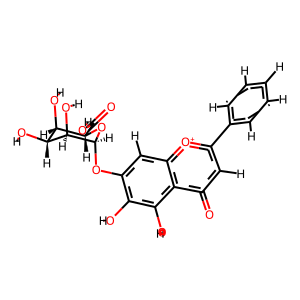

In [ ]:
#before sanitation
m=Chem.MolFromMol2File('baicalin.mol2',sanitize=False)
Draw.MolToImage(m)

In [ ]:
pdb_to_mol2('baicalin',sanitize = True)

## Preparing Ligand
This preparation merges charges, removes non-polar hydrogens, remove lone pairs , etc

In [ ]:
!python2 "/usr/local/MGLToolsPckgs/AutoDockTools/Utilities24/prepare_ligand4.py" -l baicalin_h.mol2 -o baicalin_h.pdbqt

## Prepare docking box

In [ ]:
!python3 LaBOX.py -l 'baicalin_h.mol2' -c

LaBOX.py
╰─○ Grid Box Center:  X    0.422  Y   -0.142  Z    0.759
    Grid Box Size  :  W    26.87  H   16.854  D   13.906


# **3. Simple Docking**

In [ ]:
#configure docking process
%%bash
cat > conf.txt <<EOF
receptor = NS2B_NS3_fixed.pdbqt
ligand = baicalin_h.pdbqt

out = all.pdbqt

center_x = 0.422
center_y = -0.142
center_z = 0.759

size_x = 26.87
size_y =  16.854
size_z =  13.906
EOF

In [ ]:
#start the docking process
%vina --config conf.txt --log log.txt

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -77

In [ ]:
!obabel all.pdbqt -O all.pdb

9 molecules converted


In [ ]:
#visualize a docking result
def complxvis2(protein_name,ligand_name):
  mview = py3Dmol.view(800, 400)
  mview.removeAllModels()
  mol1 = open(protein_name, 'r').read()
  mol2 = open(ligand_name, 'r').read()
  mview.addModel(mol1,'pdbqt')
  mview.setStyle({'cartoon': {'color':'spectrum'}})
  mview.addSurface(py3Dmol.VDW,{'opacity':0.6,'color':'white'})
  mview.addModel(mol2,'pdb')
  mview.setStyle({'model':1},{'stick':{}})
  mview.setBackgroundColor('0xeeeeee')
  mview.zoomTo()
  mview.show()

complxvis2('NS2B_NS3_fixed.pdbqt','all.pdb')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.